In [145]:
%load_ext sql

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [146]:
%matplotlib inline

In [147]:
%sql postgresql://appdev@data:5432/appdev

'Connected: appdev@appdev'

In [ ]:
%sql SELECT * FROM information_schema.columns WHERE table_name = 'geonames'

In [ ]:
%sql SELECT * FROM geonames WHERE population = (SELECT MAX(population) from geonames)

In [150]:
%sql DROP VIEW longit
%sql CREATE VIEW longit as SELECT longitude, latitude FROM geonames WHERE population = (SELECT MAX(population) from geonames)

Done.
Done.


[]

In [ ]:
%sql SELECT point(longitude, latitude) <-> point((SELECT longitude FROM longit), (SELECT latitude FROM longit)) FROM geonames LIMIT 50

In [152]:
%%sql CREATE OR REPLACE FUNCTION public.geodistance(alat double precision, alng double precision, blat double precision, blng double precision)
  RETURNS double precision AS
$BODY$
SELECT asin(
  sqrt(
    sin(radians($3-$1)/2)^2 +
    sin(radians($4-$2)/2)^2 *
    cos(radians($1)) *
    cos(radians($3))
  )
) * 7926.3352 AS distance;
$BODY$
  LANGUAGE sql IMMUTABLE
  COST 100;

Done.


[]

In [ ]:
%sql SELECT geodistance(latitude, longitude,(SELECT latitude FROM longit),(SELECT longitude FROM longit)) FROM geonames LIMIT 50

### 2d-plot of the 1000 largest populations from the geonames table

1000 rows affected.


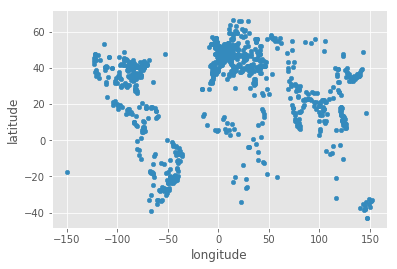

In [178]:
import matplotlib.pyplot as plt
import pandas as pd
result = %sql SELECT longitude, latitude FROM geonames ORDER BY population DESC LIMIT 1000;
df = pd.DataFrame(result, columns=['longitude', 'latitude']);
df.plot.scatter(x='longitude', y='latitude');

### Magic the Gathering

In [ ]:
%sql SELECT data FROM cards WHERE data @> '{"artist":"Rob Alexander"}' LIMIT 10

In [ ]:
%sql SELECT data FROM cards WHERE data -> 'subtypes' ? 'Human' LIMIT 10

### Histogram and bar of the grouping and count of all the colors

5 rows affected.
5 rows affected.


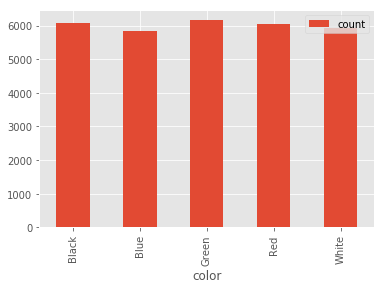

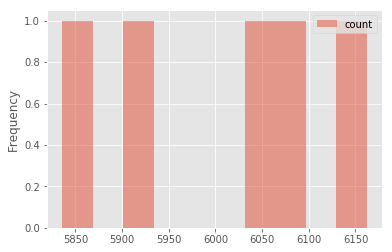

In [177]:
%sql SELECT jsonb_array_elements(data -> 'colors') AS color, count(*) FROM cards GROUP BY color;
result4 = %sql SELECT jsonb_array_elements(data -> 'colors') AS color, count(*) FROM cards GROUP BY color;
df4 = pd.DataFrame(result4, columns=['color', 'count'])
df4.plot.bar(x='color')
df4.plot.hist(stacked=True, alpha=0.5);